## Approach we should be followed:
1. Blending - Hold Out Method
2. K fold Approach - Stacking Method

In [1]:
######## import the necessary functions #########
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier

In [2]:
#### Warning Remove
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
###### import the dataset #######
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
##### check null value present or not ######
df.isnull().sum().sum()

0

In [5]:
y = df.iloc[:, -1]

In [6]:
###### Scaling the data using MinMax #######
scaler_ = StandardScaler()
df = pd.DataFrame(scaler_.fit_transform(df.iloc[:, :-1]), columns = df.columns[:-1])
df.head()

,cgpa,placement_exam_marks
0,0.371611,-0.325554
1,0.810215,0.302020
2,0.940171,0.406616
3,-0.879222,-1.266915
4,0.436589,-0.796234


In [7]:
df = pd.concat([df, y], axis = 1)
df.head()

,cgpa,placement_exam_marks,placed
0,0.371611,-0.325554,1
1,0.810215,0.302020,1
2,0.940171,0.406616,1
3,-0.879222,-1.266915,1
4,0.436589,-0.796234,0


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

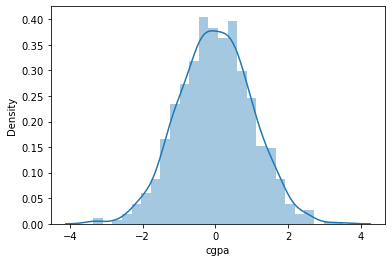

In [8]:
##### Find the outliers has or not ######
import seaborn as sns 
sns.distplot(df.loc[:, 'cgpa'])

<AxesSubplot:xlabel='cgpa'>

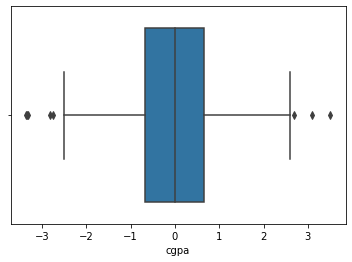

In [9]:
sns.boxplot(df.loc[:, 'cgpa'])

Done 



<AxesSubplot:xlabel='cgpa'>

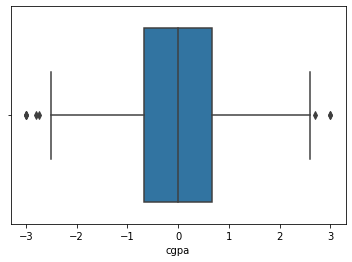

In [10]:
##### It's a normal distribution ######
upper_limit_ = df.loc[:, 'cgpa'].mean() + 3*df.loc[:, 'cgpa'].std()
lower_limit_ = df.loc[:, 'cgpa'].mean() - 3*df.loc[:, 'cgpa'].std()

##### Capping used to remove outliers ######
df.loc[:, 'cgpa'] = np.where(df.loc[:, 'cgpa'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'cgpa'] < lower_limit_,
                lower_limit_,
                df.loc[:, 'cgpa']))
print("Done \n")

sns.boxplot(df.loc[:, 'cgpa'])

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

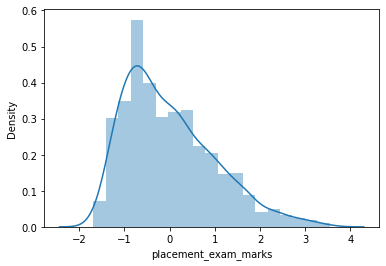

In [11]:
sns.distplot(df.loc[:, 'placement_exam_marks'])

<AxesSubplot:xlabel='placement_exam_marks'>

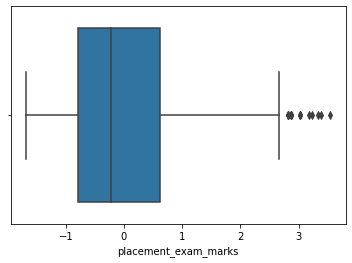

In [12]:
sns.boxplot(df.loc[:, 'placement_exam_marks'])

Done


<AxesSubplot:xlabel='placement_exam_marks'>

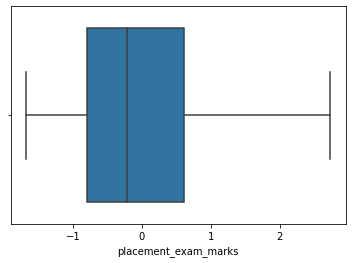

In [13]:
percentile_25 = df.loc[:, 'placement_exam_marks'].quantile(0.25)
percentile_75 = df.loc[:, 'placement_exam_marks'].quantile(0.75)

##### calculate IQR
IQR = percentile_75 - percentile_25

#### calculate upper and lower limit
upper_limit_ = percentile_75 + 1.5 * IQR
lower_limit_ = percentile_25 - 1.5 * IQR

#### capping

df.loc[:, 'placement_exam_marks'] = np.where(df.loc[:, 'placement_exam_marks'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'placement_exam_marks'] < lower_limit_,
                lower_limit_,
                df.loc[:, 'placement_exam_marks']))

print("Done")

sns.boxplot(df.loc[:, 'placement_exam_marks'])

In [14]:
df.head()

,cgpa,placement_exam_marks,placed
0,0.371611,-0.325554,1
1,0.810215,0.302020,1
2,0.940171,0.406616,1
3,-0.879222,-1.266915,1
4,0.436589,-0.796234,0


In [15]:
##### Value counts
df.iloc[:, -1].value_counts()

0    511
1    489
Name: placed, dtype: int64

In [16]:
###### Split the dataset into X and y #######
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

##### train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [17]:
##### Stacking and Blending Classifier ######
from sklearn.ensemble import StackingClassifier

##### Define estimators ######
estimators_ = [
    ('random_forest', RandomForestClassifier(n_estimators=10)),
    ('gradient_boost', GradientBoostingClassifier()),
    ('adaboost', AdaBoostClassifier())
]

#### call the StackingClassifier ####
stackingClassifier_ = StackingClassifier(estimators = estimators_, final_estimator = XGBClassifier(), cv = 5)
stackingClassifier_.fit(X_train, y_train)
predicted_ = stackingClassifier_.predict(X_test)
print("accuracy is = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("recall is = ", recall_score(predicted_, y_test))
print("f1 score is = ", f1_score(predicted_, y_test))

accuracy is =  0.5
precision is =  0.4965034965034965
recall is =  0.47651006711409394
f1 score is =  0.48630136986301364


In [18]:
logistic_ = XGBClassifier()
logistic_.fit(X_train, y_train)
predicted_ = logistic_.predict(X_test)
print("accuracy is = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("recall is = ", recall_score(predicted_, y_test))
print("f1 score is = ", f1_score(predicted_, y_test))

accuracy is =  0.5233333333333333
precision is =  0.5594405594405595
recall is =  0.5
f1 score is =  0.528052805280528


In [19]:
from sklearn.svm import SVC

logistic_ = SVC(kernel='sigmoid', degree=10)
logistic_.fit(X_train, y_train)
predicted_ = logistic_.predict(X_test)
print("accuracy is = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("recall is = ", recall_score(predicted_, y_test))
print("f1 score is = ", f1_score(predicted_, y_test))

accuracy is =  0.5533333333333333
precision is =  0.5174825174825175
recall is =  0.5323741007194245
f1 score is =  0.5248226950354611


In [20]:
from sklearn.neighbors import KNeighborsClassifier

logistic_ = KNeighborsClassifier()
logistic_.fit(X_train, y_train)
predicted_ = logistic_.predict(X_test)
print("accuracy is = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("recall is = ", recall_score(predicted_, y_test))
print("f1 score is = ", f1_score(predicted_, y_test))

accuracy is =  0.5333333333333333
precision is =  0.5664335664335665
recall is =  0.5094339622641509
f1 score is =  0.5364238410596027


In [21]:
from sklearn.naive_bayes import GaussianNB

logistic_ = GaussianNB()
logistic_.fit(X_train, y_train)
predicted_ = logistic_.predict(X_test)
print("accuracy is = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("recall is = ", recall_score(predicted_, y_test))
print("f1 score is = ", f1_score(predicted_, y_test))

accuracy is =  0.51
precision is =  0.27972027972027974
recall is =  0.47619047619047616
f1 score is =  0.35242290748898686


In [22]:
##### Using Feature Imporatnce

from sklearn.naive_bayes import GaussianNB

logistic_ = RandomForestClassifier()
logistic_.fit(X_train, y_train)
predicted_ = logistic_.predict(X_test)

In [23]:
logistic_.feature_importances_

array([0.61482911, 0.38517089])

In [24]:
df.head()

,cgpa,placement_exam_marks,placed
0,0.371611,-0.325554,1
1,0.810215,0.302020,1
2,0.940171,0.406616,1
3,-0.879222,-1.266915,1
4,0.436589,-0.796234,0


In [25]:
###### Split the dataset into X and y #######
X = df.iloc[:, 0].values
y = df.iloc[:, -1].values
X = X.reshape((-1,1))

##### train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [26]:
X.shape, y.shape

((1000, 1), (1000,))

In [39]:
##### Using Feature Imporatnce

from sklearn.naive_bayes import GaussianNB

logistic_ = SVC(kernel='poly', C = 2.9)
logistic_.fit(X_train, y_train)
predicted_ = logistic_.predict(X_test)

In [43]:
accuracy_score(predicted_, y_test)

0.5233333333333333